# Nimra Sohail DS HOMEOWRK 10

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [83]:
df = pd.read_csv('McDonaldsMenu.csv')
df.head(2)

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8


## 1 &2) Cleaning the data: removing the columns Category and Item and cleaning the srving size column

In [74]:
inter = df.iloc[:,2]
for i in range(len(inter)):
    k =inter.iloc[i] #in a particular row
    s= k.split(" ")
    inter[i] = s[0]
df['Serving Size'] =inter
df.rename(columns ={'Serving Size' :'Serving Size in Oz'},inplace=True)
df.head(1)

C:\Users\PC\AppData\Local\Temp\ipykernel_15392\1930374432.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inter[i] = s[0]


,Category,Item,Serving Size in Oz,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8,300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15


In [84]:
df.columns

Index(['Category', 'Item', 'Serving Size', 'Calories', 'Calories from Fat',
       'Total Fat', 'Total Fat (% Daily Value)', 'Saturated Fat',
       'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol',
       'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)',
       'Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber',
       'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein',
       'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)',
       'Calcium (% Daily Value)', 'Iron (% Daily Value)'],
      dtype='object')

In [85]:
X = df.drop(['Serving Size','Category', 'Item'],axis=1)
X.head()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,300,120,13.0,20,5.0,25,0.0,260,87,750,...,31,10,4,17,3,17,10,0,25,15
1,250,70,8.0,12,3.0,15,0.0,25,8,770,...,30,10,4,17,3,18,6,0,25,8
2,370,200,23.0,35,8.0,42,0.0,45,15,780,...,29,10,4,17,2,14,8,0,25,10
3,450,250,28.0,43,10.0,52,0.0,285,95,860,...,30,10,4,17,2,21,15,0,30,15
4,400,210,23.0,35,8.0,42,0.0,50,16,880,...,30,10,4,17,2,21,6,0,25,10


## Normalizing the data before clustering because data within the same column is too scattered as well

#### Why are we normalizing?
Clustering algorithms that use distance measures (such as K-Means) can be sensitive to the scale of features. Normalization ensures that all features contribute equally to the distance computation.
It can help certain clustering algorithms converge faster, especially those that rely on distance metrics.
It prevents features with larger scales from dominating the clustering process. All features are given equal importance.
Normalization can improve the performance and interpretability of the clustering model.

In [86]:
scaler = MinMaxScaler()
XS = scaler.fit_transform(X)
XS[1:5]

array([[0.13297872, 0.06603774, 0.06779661, 0.06593407, 0.15      ,
        0.14705882, 0.        , 0.04347826, 0.04166667, 0.21388889,
        0.21333333, 0.21276596, 0.21276596, 0.57142857, 0.60714286,
        0.0234375 , 0.20689655, 0.03529412, 0.        , 0.35714286,
        0.2       ],
       [0.19680851, 0.18867925, 0.19491525, 0.19230769, 0.4       ,
        0.41176471, 0.        , 0.07826087, 0.078125  , 0.21666667,
        0.22      , 0.20567376, 0.21276596, 0.57142857, 0.60714286,
        0.015625  , 0.16091954, 0.04705882, 0.        , 0.35714286,
        0.25      ],
       [0.2393617 , 0.23584906, 0.23728814, 0.23626374, 0.5       ,
        0.50980392, 0.        , 0.49565217, 0.49479167, 0.23888889,
        0.24      , 0.21276596, 0.21276596, 0.57142857, 0.60714286,
        0.015625  , 0.24137931, 0.08823529, 0.        , 0.42857143,
        0.375     ],
       [0.21276596, 0.19811321, 0.19491525, 0.19230769, 0.4       ,
        0.41176471, 0.        , 0.08695652, 0.0833333

# 4) Finding optimal number of clusters

#### what are we trying to do here?
<br>1)wss stands for "Within-Cluster Sum of Squares." It is a measure of the compactness of the clusters. The goal of k-means clustering is to minimize the within-cluster sum of squares, and this metric is used to evaluate the performance of the algorithm for different values of k.
<br>2)The code runs a loop from 1 to 14, where i represents the number of clusters (k) you are testing. For each value of k, a k-means clustering model is created (KMeans from scikit-learn).
<br>3)max_iter is the maximum number of iterations for the k-means algorithm. It represents the maximum number of times the algorithm will adjust the cluster centroids to minimize the within-cluster sum of squares.
random_state is used for reproducibility, ensuring that if you run the code multiple times, you get the same result, given the same random initialization.

<br>The inertia represents how far the points within a cluster are from the centroid. Lower inertia indicates better clustering.
The purpose of this code is to generate a plot of the within-cluster sum of squares for different values of k. The optimal value of k is often associated with the "elbow" of the plot, where increasing the number of clusters does not significantly decrease the within-cluster sum of squares. The idea is to find a point where the reduction in sum of squares slows down, and adding more clusters does not lead to a significant improvement.

C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

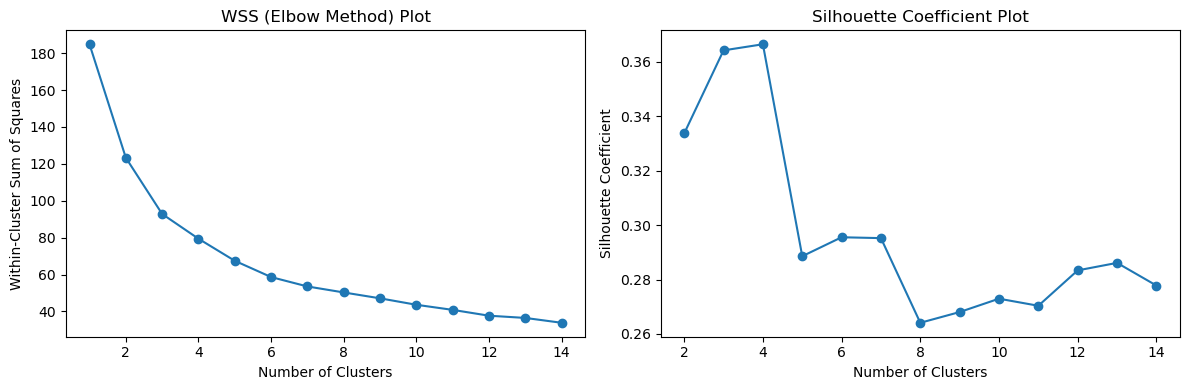

In [90]:
# WSS (Elbow Method) Plot
wss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, max_iter=300, random_state=99)
    kmeans.fit(XS)
    wss.append(kmeans.inertia_)

# Silhouette Coefficient Plot
silhouette_scores = []
for i in range(2, 15):
    kmeans = KMeans(n_clusters=i, max_iter=300, random_state=99)
    kmeans.fit(XS)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(XS, labels)
    silhouette_scores.append(silhouette_avg)

# Plotting WSS (Elbow Method)
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(range(1, 15), wss, marker='o')
plt.title('WSS (Elbow Method) Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares')

# Plotting Silhouette Coefficient
plt.subplot(1, 2, 2)
plt.plot(range(2, 15), silhouette_scores, marker='o')
plt.title('Silhouette Coefficient Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')

plt.tight_layout()
plt.show()

#### Analysis:
These plots are very much helpful when it comes to seeing what k value for clusters is going to be right. So I was initially seeing only the Elboth method plot and thought that since the graph is going more steep down in terms of the wss values then the k value should be larger. However, when the silhoutte coefficient plots was also potted, things got much clearer. It can be seen very clearly that for K=4 the silhoutte coefficeint is the highest that is 0.37 approximately. So basically when silhoutte value is greater than 0.2 as sir told in class it shows a good indication that k value for clusters is selected right. However, when k value is increased the silhoutter value drops.

The Silhouette Coefficient is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). It ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. 
Silhouette analysis is one tool among others, and it can be used in conjunction with the Elbow Method. The Elbow Method looks for the "elbow" point where the Within-Cluster Sum of Squares (WCSS) starts to decrease at a slower rate.
The silhoutter value that is highest indicates that the sample is far away from the neighboring clusters. This is a good sign that the cluster assignment is appropriate.In other words, a high positive Silhouette Coefficient suggests that the data point is appropriately placed within its own cluster and is well-separated from other clusters. This is indicative of a good clustering scenario where the clusters are cohesive and distinct.

We can conclude that a k=4 value for clusters is the right choice.

# Performing K means clustering again with right number of k clusters

In [100]:
kmeans = KMeans(n_clusters=4, max_iter=300, random_state=99)
kmeans.fit(XS)
labels = kmeans.labels_
silhouette_avg = silhouette_score(XS, labels,metric = 'euclidean')
silhouette_avg

C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.36644129499485634

In [101]:
Y = kmeans.fit_predict(XS)
Y

C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 3, 3, 0, 0, 3, 3, 3, 3, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 3, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1])

# 6) Visualizing the clustering results

Text(0.5, 1.0, 'Dataset post clustering results distinguised on colors')

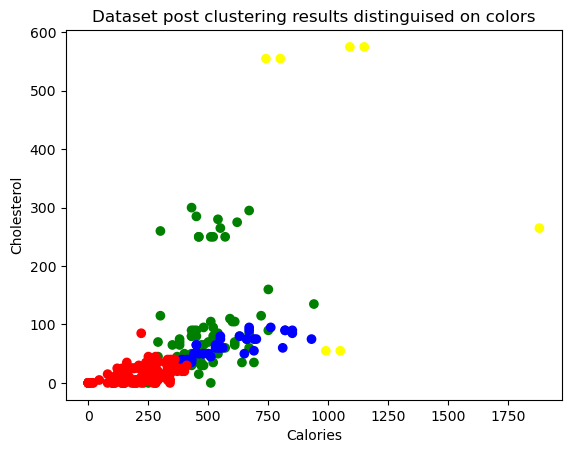

In [129]:
color2=np.array(['green','red','blue','yellow'])
plt.scatter(x=X.Calories,y=X.Cholesterol,c=color2[kmeans.labels_])
plt.xlabel('Calories')
plt.ylabel('Cholesterol')
plt.title("Dataset post clustering results distinguised on colors")

It can be seen that our data points do belong to 4 differnet clusters( we havent named them yet) but they overlap too.

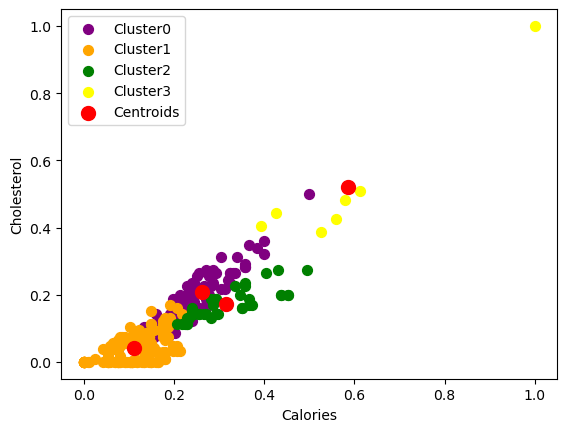

In [130]:
#Visualising the clusters
plt.scatter(XS[Y == 0, 0], XS[Y == 0, 1], s = 50, c = 'purple', label = 'Cluster0')
plt.scatter(XS[Y == 1, 0], XS[Y == 1, 1], s = 50, c = 'orange', label = 'Cluster1')
plt.scatter(XS[Y == 2, 0], XS[Y == 2, 1], s = 50, c = 'green', label = 'Cluster2')
plt.scatter(XS[Y == 3, 0], XS[Y == 3, 1], s = 50, c = 'yellow', label = 'Cluster3')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.xlabel('Calories')
plt.ylabel('Cholesterol')
plt.legend()

Here we can also see the centroids for teh clusters. Note that the centroids near purple and green are showing tehat there teh data is much overlapped.

# 7)Use cluster labels to your original dataset to create cluster specific data frames.

In [107]:
kmeans = KMeans(n_clusters=4, max_iter=300, random_state=99)
kmeans.fit(XS)
labels = kmeans.labels_
silhouette_avg = silhouette_score(XS, labels,metric = 'euclidean')
silhouette_avg
df['Cluster'] = labels #i add teh cluster label for each row
df.head(2)

C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Cluster
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,10,4,17,3,17,10,0,25,15,0
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,10,4,17,3,18,6,0,25,8,0


## just seeing first how mnay entries do each cluster has, how many rows do each cluster has.

In [117]:
group=df.copy()
#group.groupby(['grade','sub_grade']).count()
group.groupby(['Cluster']).size().reset_index(name='Counts')

,Cluster,Counts
0,0,74
1,1,142
2,2,37
3,3,7


## starting from cluster 0, we can see it has 74 rows/entries

In [124]:
cluster_groups = df.groupby('Cluster')
cluster_0_df = df[df['Cluster'] == 0]
cluster_0_df

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Cluster
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,10,4,17,3,17,10,0,25,15,0
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,10,4,17,3,18,6,0,25,8,0
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,10,4,17,2,14,8,0,25,10,0
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,10,4,17,2,21,15,0,30,15,0
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,10,4,17,2,21,6,0,25,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,Salads,Premium Southwest Salad (without Chicken),8.1 oz (230 g),140,40,4.5,7,2.0,9,0.0,...,7,6,23,6,6,160,25,15,10,0
88,Salads,Premium Southwest Salad with Crispy Chicken,12.3 oz (348 g),450,190,22.0,33,4.5,22,0.0,...,14,7,28,12,23,170,30,15,15,0
89,Salads,Premium Southwest Salad with Grilled Chicken,11.8 oz (335 g),290,80,8.0,13,2.5,13,0.0,...,9,7,28,10,27,170,30,15,15,0
98,Snacks & Sides,Large French Fries,5.9 oz (168 g),510,220,24.0,37,3.5,17,0.0,...,22,5,22,0,6,0,70,2,8,0


In [125]:
cluster_1_df = df[df['Cluster'] == 1]
cluster_1_df #cluster 1 has 142 entries

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Cluster
35,Breakfast,Hotcakes,5.3 oz (151 g),350,80,9.0,13,2.0,9,0.0,...,20,3,10,14,8,0,0,15,15,1
38,Breakfast,Hash Brown,2 oz (56 g),150,80,9.0,14,1.5,6,0.0,...,5,2,6,0,1,0,2,0,2,1
40,Breakfast,Fruit & Maple Oatmeal,9.6 oz (251 g),290,35,4.0,6,1.5,8,0.0,...,19,5,19,32,5,2,130,10,10,1
41,Breakfast,Fruit & Maple Oatmeal without Brown Sugar,9.6 oz (251 g),260,40,4.0,6,1.5,8,0.0,...,16,5,22,18,5,2,130,6,10,1
48,Beef & Pork,Hamburger,3.5 oz (98 g),240,70,8.0,12,3.0,15,0.0,...,11,1,6,6,12,2,2,10,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,Smoothies & Shakes,Mango Pineapple Smoothie (Small),12 fl oz cup,210,5,0.5,1,0.0,0,0.0,...,17,1,4,46,2,30,20,8,2,1
239,Smoothies & Shakes,Mango Pineapple Smoothie (Medium),16 fl oz cup,260,10,1.0,1,0.0,0,0.0,...,20,1,5,56,3,40,25,8,2,1
240,Smoothies & Shakes,Mango Pineapple Smoothie (Large),22 fl oz cup,340,10,1.0,2,0.5,3,0.0,...,26,2,6,72,4,50,30,10,2,1
257,Smoothies & Shakes,McFlurry with Oreo Cookies (Snack),6.7 oz (190 g),340,100,11.0,17,6.0,29,0.0,...,18,1,2,43,8,10,0,25,6,1


In [126]:
cluster_2_df = df[df['Cluster'] == 2]
cluster_2_df#cluster 2 has 37 entries/rows

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Cluster
153,Coffee & Tea,Caramel Latte (Large),20 fl oz cup,430,120,14.0,21,8.0,39,0.0,...,21,1,6,59,15,15,0,50,2,2
156,Coffee & Tea,Hazelnut Latte (Large),20 fl oz cup,430,120,14.0,21,8.0,39,0.0,...,21,1,6,58,15,15,0,50,2,2
159,Coffee & Tea,French Vanilla Latte (Large),20 fl oz cup,420,120,14.0,21,8.0,39,0.0,...,20,1,6,56,15,15,0,50,2,2
179,Coffee & Tea,Mocha (Medium),16 fl oz cup,410,120,14.0,21,8.0,40,0.0,...,20,2,8,53,13,10,0,40,6,2
180,Coffee & Tea,Mocha (Large),20 fl oz cup,500,150,17.0,26,10.0,49,0.5,...,24,2,10,63,16,15,0,50,8,2
185,Coffee & Tea,Caramel Mocha (Medium),16 fl oz cup,390,120,14.0,21,8.0,40,0.5,...,18,1,4,50,12,15,0,40,2,2
186,Coffee & Tea,Caramel Mocha (Large),20 fl oz cup,480,150,17.0,26,10.0,49,0.5,...,22,1,5,60,16,15,0,50,4,2
191,Coffee & Tea,Hot Chocolate (Medium),16 fl oz cup,440,140,16.0,25,9.0,47,0.5,...,20,1,4,56,14,15,0,45,6,2
192,Coffee & Tea,Hot Chocolate (Large),20 fl oz cup,540,180,20.0,31,12.0,58,0.5,...,24,1,5,68,17,20,0,60,8,2
213,Coffee & Tea,Iced Mocha (Large),22 fl oz cup,480,150,16.0,25,10.0,49,0.5,...,23,2,8,62,14,15,0,40,8,2


In [127]:
cluster_3_df = df[df['Cluster'] == 3]
cluster_3_df#cluster 3 has 7 rows/entries

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Cluster
27,Breakfast,Big Breakfast (Regular Biscuit),9.5 oz (269 g),740,430,48.0,73,17.0,87,0.0,...,17,3,12,3,28,15,2,15,25,3
28,Breakfast,Big Breakfast (Large Biscuit),10 oz (283 g),800,470,52.0,80,18.0,90,0.0,...,19,4,17,3,28,15,2,15,30,3
31,Breakfast,Big Breakfast with Hotcakes (Regular Biscuit),14.8 oz (420 g),1090,510,56.0,87,19.0,96,0.0,...,37,6,23,17,36,15,2,25,40,3
32,Breakfast,Big Breakfast with Hotcakes (Large Biscuit),15.3 oz (434 g),1150,540,60.0,93,20.0,100,0.0,...,39,7,28,17,36,15,2,30,40,3
33,Breakfast,Big Breakfast with Hotcakes and Egg Whites (Re...,14.9 oz (423 g),990,410,46.0,70,16.0,78,0.0,...,37,6,23,17,35,0,2,25,30,3
34,Breakfast,Big Breakfast with Hotcakes and Egg Whites (La...,15.4 oz (437 g),1050,450,50.0,77,16.0,81,0.0,...,38,7,28,18,35,4,2,25,30,3
82,Chicken & Fish,Chicken McNuggets (40 piece),22.8 oz (646 g),1880,1060,118.0,182,20.0,101,1.0,...,39,6,24,1,87,0,15,8,25,3


We have succesfully used cluster specific labels to udnertstand ecah cluster dataframe. Based on tehse we can give the labels/names to teh clusters easily

# 8) generating insights from clusters

In [131]:
C1 = X.iloc[Y == 0, :]
C2 = X.iloc[Y == 1, :]
C3 = X.iloc[Y == 2, :]
C4 = X.iloc[Y == 3, :]

In [132]:
C1.describe()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,...,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,490.135135,222.162162,24.695946,38.067568,8.770270,43.932432,0.317568,96.351351,32.054054,1128.108108,...,43.621622,14.540541,3.027027,12.081081,7.662162,23.675676,19.986486,9.905405,17.486486,17.175676
std,130.021002,80.380436,9.000311,13.867604,3.737252,18.649860,0.552543,81.712398,27.305924,337.816014,...,10.920262,3.645937,1.122289,4.796565,5.237580,9.166807,36.584110,11.540481,7.813307,5.684292
min,140.000000,40.000000,4.500000,7.000000,2.000000,9.000000,0.000000,0.000000,0.000000,150.000000,...,20.000000,7.000000,1.000000,5.000000,0.000000,2.000000,0.000000,0.000000,2.000000,6.000000
25%,430.000000,180.000000,20.000000,31.000000,6.000000,31.250000,0.000000,45.000000,14.250000,915.000000,...,35.000000,12.000000,2.000000,8.000000,3.000000,18.000000,4.000000,2.000000,15.000000,15.000000
50%,475.000000,220.000000,24.000000,37.000000,9.000000,44.000000,0.000000,70.000000,23.000000,1180.000000,...,42.500000,14.000000,3.000000,12.000000,7.000000,22.000000,7.000000,8.000000,17.500000,15.000000
75%,547.500000,277.500000,30.750000,47.000000,11.750000,58.250000,0.500000,105.000000,34.750000,1335.000000,...,50.750000,17.000000,3.000000,14.000000,10.750000,29.750000,10.000000,15.000000,23.750000,20.000000
max,940.000000,530.000000,59.000000,91.000000,19.000000,96.000000,2.500000,300.000000,100.000000,1800.000000,...,68.000000,23.000000,7.000000,28.000000,32.000000,48.000000,170.000000,70.000000,30.000000,35.000000


#### Analysis on cluster1:
I can understand this cluster by analyzing:

1. Calories:
The average calorie content in this menu cluster is approximately 490 calories, suggesting a moderate caloric load on average. This is generally suitable for individuals with average energy needs. However, it's noteworthy that the maximum value is 940 calories, indicating the presence of items with higher caloric content. Individuals aiming for weight management may need to exercise moderation when selecting such items, considering the potential impact on overall daily calorie intake.

2. Total Fat:
The mean total fat content is approximately 24.7 grams, representing a moderate level that aligns with a balanced diet. However, the maximum value of 59.0 grams suggests the presence of items with higher fat content. While moderate fat intake is generally acceptable, individuals monitoring fat intake for heart health or weight management may need to be cautious with items at the upper end of the spectrum.

3. Cholesterol:
The mean cholesterol content is around 96.4 milligrams, indicating a moderate level suitable for most individuals. However, the maximum value of 300 milligrams suggests the existence of items with higher cholesterol content. Those with specific dietary restrictions or concerns about heart health may need to be mindful of these items and consider their overall daily cholesterol intake.

4. Sodium:
The average sodium content is around 1128 milligrams, falling within a moderate range suitable for individuals with average sodium requirements. However, the maximum value of 1800 milligrams suggests the presence of items with higher sodium content. Individuals aiming to limit their sodium intake for health reasons, such as managing hypertension, should be aware of these items and consider them in the context of their overall daily sodium goals.

5. Carbohydrates:
The mean carbohydrates content is approximately 43.6 grams, indicating a moderate carbohydrate level suitable for a balanced diet. The maximum value of 68 grams suggests the presence of items with a higher carbohydrate content. Individuals managing their carbohydrate intake, such as those following specific dietary plans or athletes with higher energy needs, may find these items relevant, but others may want to consume them in moderation.

6. Protein:
The mean protein content is around 23.7 grams, representing a moderate protein level suitable for most individuals. The maximum value of 48 grams indicates the presence of items with higher protein content, potentially appealing to individuals looking to meet increased protein requirements for muscle building or maintenance. This diversity in protein content caters to a range of dietary preferences and goals, allowing consumers to choose items that align with their protein needs.

7. Sugar:
The mean sugar content in this menu cluster is approximately 7.7 grams, suggesting a moderate level of added sugars. This aligns with general dietary recommendations, as excessive sugar intake can contribute to health issues. The maximum value of 32 grams indicates the presence of items with a higher sugar content. Individuals aiming to manage their sugar intake, such as those with concerns about blood sugar levels or those following a low-sugar diet, should be mindful of items with elevated sugar content. It's advisable to prioritize items with lower sugar levels for overall health and well-being.

#### Analysis on Clutser01

In [134]:
C2.describe()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.0,142.000000,142.000000,142.000000,...,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,210.070423,42.359155,4.771127,7.345070,2.316901,11.429577,0.0,15.105634,5.190141,151.830986,...,35.746479,11.922535,0.901408,3.549296,28.922535,6.563380,8.753521,10.274648,16.732394,2.514085
std,112.827908,46.282718,5.175167,7.920747,2.520469,12.312940,0.0,15.257463,5.228038,178.546614,...,21.191272,7.093173,1.080516,4.291799,21.877828,5.941159,18.269529,34.361892,17.044754,3.590247
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,140.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,41.250000,...,21.000000,7.000000,0.000000,0.000000,6.000000,1.000000,0.000000,0.000000,0.500000,0.000000
50%,225.000000,30.000000,3.500000,5.500000,1.750000,8.500000,0.0,10.000000,3.000000,115.000000,...,38.000000,13.000000,1.000000,3.000000,30.000000,5.000000,4.000000,0.000000,10.000000,0.000000
75%,290.000000,80.000000,9.000000,13.000000,4.500000,22.000000,0.0,25.000000,9.000000,180.000000,...,50.000000,17.000000,1.000000,5.000000,45.000000,11.000000,10.000000,0.000000,30.000000,4.000000
max,410.000000,180.000000,20.000000,30.000000,8.000000,39.000000,0.0,85.000000,29.000000,810.000000,...,79.000000,26.000000,5.000000,22.000000,76.000000,29.000000,170.000000,240.000000,60.000000,15.000000


#### Analysis on cluster02:
1. Calories:
The average calorie content in Cluster 02 is 210.07 calories, indicating a focus on lower-calorie options. Items in this cluster are suitable for individuals aiming for lighter meals. Even the maximum value of 410 calories suggests that, while there are slightly higher-calorie options, they remain within a reasonable range, offering a variety of choices for different preferences.

2. Total Fat:
With a mean total fat content of 4.77 grams, Cluster 02 emphasizes lower-fat options. This makes it a suitable choice for those looking to manage their fat intake. The maximum value of 20 grams indicates the presence of items with slightly higher fat content, but overall, the cluster leans towards items that are lower in fat.

3. Cholesterol:
The average cholesterol content is 15.11 milligrams, suggesting that items in Cluster 02 are generally low in cholesterol. This makes the cluster suitable for individuals who need to be mindful of their cholesterol intake. The maximum value of 85 milligrams indicates that even items with higher cholesterol content in this cluster are not excessively high.

4. Sodium:
Cluster 02 focuses on lower sodium content, with an average of 151.83 milligrams. This makes it a good choice for individuals looking to limit their sodium intake. While the maximum value of 810 milligrams suggests some items with slightly higher sodium content, the overall trend is towards lower sodium options.

5. Carbohydrates:
The mean carbohydrates content in Cluster 02 is 35.75 grams, indicating a moderate level of carbohydrates. This provides a balance between lower and higher carbohydrate options, catering to individuals with different dietary preferences. The maximum value of 79 grams suggests the presence of items with higher carbohydrate content, offering diversity in choices.

6. Protein:
With a mean protein content of 6.56 grams, Cluster 02 may not be a significant source of protein. It is more suitable for those seeking meals with lower protein content. The maximum value of 29 grams indicates that there are items with slightly higher protein content, providing some variety for those with different protein requirements.

7. Sugar:
In Cluster 02, the mean sugar content is relatively low at 28.92 grams, indicating a focus on options with moderate to lower sugar levels. This makes the cluster suitable for individuals who are mindful of their sugar intake or those aiming for healthier, less sugary alternatives. Even the maximum value of 76 grams suggests that while there are items with slightly higher sugar content, the overall trend is towards items that are not excessively sweet. The diversity in sugar content allows individuals to choose items that align with their preferences, whether they are looking for lower-sugar options or items with a slightly sweeter taste.

In [135]:
C3.describe()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,...,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.0,37.000000,37.000000
mean,593.243243,181.621622,20.216216,31.081081,12.378378,61.729730,0.770270,64.189189,21.405405,220.135135,...,89.972973,29.945946,0.891892,3.918919,78.378378,13.486486,19.054054,0.0,44.324324,4.405405
std,149.463003,47.755949,5.218211,8.101366,3.311188,16.992888,0.401293,18.047527,5.856902,68.814227,...,26.349664,8.787447,0.698561,2.994239,21.727289,3.556072,5.507298,0.0,12.481217,3.692782
min,390.000000,120.000000,14.000000,21.000000,8.000000,39.000000,0.000000,35.000000,11.000000,120.000000,...,55.000000,18.000000,0.000000,0.000000,50.000000,7.000000,10.000000,0.0,20.000000,0.000000
25%,460.000000,150.000000,16.000000,25.000000,10.000000,49.000000,0.500000,50.000000,17.000000,180.000000,...,65.000000,22.000000,0.000000,0.000000,59.000000,11.000000,15.000000,0.0,35.000000,2.000000
50%,550.000000,170.000000,19.000000,29.000000,12.000000,60.000000,1.000000,60.000000,21.000000,210.000000,...,86.000000,29.000000,1.000000,4.000000,71.000000,14.000000,20.000000,0.0,45.000000,4.000000
75%,690.000000,210.000000,23.000000,35.000000,15.000000,73.000000,1.000000,75.000000,25.000000,260.000000,...,109.000000,36.000000,1.000000,6.000000,93.000000,15.000000,20.000000,0.0,50.000000,8.000000
max,930.000000,290.000000,33.000000,50.000000,20.000000,102.000000,1.500000,95.000000,32.000000,400.000000,...,141.000000,47.000000,2.000000,10.000000,128.000000,21.000000,30.000000,0.0,70.000000,15.000000


#### Analysis on cluster3:
1. Calories:
Cluster 03 has an average calorie content of 593.24, indicating that items in this cluster are generally higher in calories. This suggests that the cluster caters to those looking for more substantial or energy-dense meal options. The maximum value of 930 calories indicates the presence of items with a significantly higher calorie content, offering a diverse range of choices within the cluster.

2. Total Fat:
With a mean total fat content of 20.22 grams, Cluster 03 offers items with a moderate fat content. This suggests a balanced approach to fat intake, making it suitable for those who prefer a mix of lower and higher-fat options. The maximum value of 33 grams indicates the presence of items with slightly higher fat content, providing variety within the cluster.

3. Cholesterol:
The average cholesterol content in Cluster 03 is 64.19 milligrams, indicating a moderate level. This makes the cluster suitable for individuals who are not overly concerned about cholesterol intake. The maximum value of 95 milligrams suggests that even items with higher cholesterol content in this cluster are within a reasonable range.

4. Sodium:
Cluster 03 focuses on a moderate sodium content, with an average of 220.14 milligrams. This suggests that items in this cluster are suitable for individuals who prefer meals with a balanced sodium intake. The maximum value of 400 milligrams indicates the presence of items with slightly higher sodium content, offering diversity within the cluster.

5. Carbohydrates:
With a mean carbohydrates content of 89.97 grams, Cluster 03 emphasizes higher-carbohydrate options. This makes the cluster suitable for individuals who are looking for energy-dense meals or those with higher carbohydrate dietary preferences. The maximum value of 141 grams suggests the presence of items with significantly higher carbohydrate content, catering to diverse tastes.

6. Protein:
Cluster 03 has a mean protein content of 13.49 grams, indicating that items in this cluster are moderate protein sources. This makes the cluster suitable for those seeking a balance between higher and lower protein options. The maximum value of 21 grams suggests that there are items with slightly higher protein content, providing variety within the cluster.

7. Sugar:
The average sugar content is 78.38 grams in Cluster 03, indicating that items in this cluster are generally higher in sugar. This suggests that the cluster caters to individuals with a preference for sweeter options or those looking for indulgent treats. The maximum value of 128 grams indicates the presence of items with significantly higher sugar content, offering a diverse range of choices within the cluster.

In [136]:
C4.describe()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,1100.000000,552.857143,61.428571,94.571429,18.000000,90.428571,0.142857,376.428571,125.857143,2244.285714,...,96.714286,32.285714,5.571429,22.142857,10.857143,40.714286,9.142857,3.857143,20.428571,31.428571
std,375.322084,228.087285,25.395913,39.356732,1.732051,9.034326,0.377964,245.521796,81.589273,663.497228,...,29.685655,9.810102,1.511858,5.814596,8.008924,20.718062,7.425824,4.913538,7.828519,6.267832
min,740.000000,410.000000,46.000000,70.000000,16.000000,78.000000,0.000000,55.000000,19.000000,1560.000000,...,51.000000,17.000000,3.000000,12.000000,1.000000,28.000000,0.000000,2.000000,8.000000,25.000000
25%,895.000000,440.000000,49.000000,75.000000,16.500000,84.000000,0.000000,160.000000,54.000000,1915.000000,...,83.000000,28.000000,5.000000,20.000000,3.000000,31.500000,2.000000,2.000000,15.000000,27.500000
50%,1050.000000,470.000000,52.000000,80.000000,18.000000,90.000000,0.000000,555.000000,185.000000,2170.000000,...,111.000000,37.000000,6.000000,23.000000,17.000000,35.000000,15.000000,2.000000,25.000000,30.000000
75%,1120.000000,525.000000,58.000000,90.000000,19.500000,98.000000,0.000000,565.000000,188.500000,2275.000000,...,115.500000,38.500000,6.500000,26.000000,17.000000,36.000000,15.000000,2.000000,25.000000,35.000000
max,1880.000000,1060.000000,118.000000,182.000000,20.000000,101.000000,1.000000,575.000000,192.000000,3600.000000,...,118.000000,39.000000,7.000000,28.000000,18.000000,87.000000,15.000000,15.000000,30.000000,40.000000


#### Analysis on cluster4:
1. Calories:
Cluster 04 has an average calorie content of 1100, indicating that items in this cluster are significantly higher in calories. This suggests that the cluster caters to those looking for substantial and energy-dense meal options. The maximum value of 1880 calories indicates the presence of items with a very high caloric content, offering a diverse range within the cluster.

2. Total Fat:
With a mean total fat content of 61.43 grams, Cluster 04 offers items with a high fat content. This suggests a focus on richer and potentially indulgent options. The maximum value of 118 grams indicates the presence of items with considerably higher fat content, providing variety within the cluster.

3. Cholesterol:
The average cholesterol content in Cluster 04 is 376.43 milligrams, indicating a high level. This makes the cluster suitable for individuals who are not overly concerned about cholesterol intake. The maximum value of 575 milligrams suggests that even items with higher cholesterol content in this cluster are within a considerable range.

4. Sodium:
Cluster 04 focuses on a high sodium content, with an average of 2244.29 milligrams. This suggests that items in this cluster are suitable for individuals who prefer meals with a more pronounced salty flavor. The maximum value of 3600 milligrams indicates the presence of items with significantly higher sodium content, offering diversity within the cluster.

5. Carbohydrates:
With a mean carbohydrates content of 96.71 grams, Cluster 04 emphasizes higher-carbohydrate options. This makes the cluster suitable for individuals who are looking for energy-dense meals or those with higher carbohydrate dietary preferences. The maximum value of 118 grams suggests the presence of items with significantly higher carbohydrate content, catering to diverse tastes.

6. Protein:
Cluster 04 has a mean protein content of 40.71 grams, indicating that items in this cluster are high protein sources. This makes the cluster suitable for those seeking protein-rich meal options. The maximum value of 87 grams suggests that there are items with even higher protein content, providing variety within the cluster.

7. Sugar:
The average sugar content is 10.86 grams in Cluster 04, indicating that items in this cluster are generally lower in sugar. This suggests that the cluster caters to individuals who prefer savory or less sweet options. The maximum value of 18 grams indicates the presence of items with slightly higher sugar content, offering a balanced range of choices within the cluster.

#### visulaizing tehse 7 paramters for each cluster to giev unique names.

In [139]:
group=df.copy()
group.groupby('Cluster').agg({
    'Calories': 'mean',
    'Total Fat': 'mean',
    'Cholesterol': 'mean',
    'Sodium': 'mean',
    'Carbohydrates': 'mean',
    'Protein': 'mean',
    'Sugars': 'mean'
})

,Calories,Total Fat,Cholesterol,Sodium,Carbohydrates,Protein,Sugars
Cluster,,,,,,,
0,490.135135,24.695946,96.351351,1128.108108,43.621622,23.675676,7.662162
1,210.070423,4.771127,15.105634,151.830986,35.746479,6.563380,28.922535
2,593.243243,20.216216,64.189189,220.135135,89.972973,13.486486,78.378378
3,1100.000000,61.428571,376.428571,2244.285714,96.714286,40.714286,10.857143


I would name teh clusters as follows:
As per my observations cluster0 is likely taking tehse 7 attributes moderately, cluster01 is having low quantity of these attributes, cluster02 is having high content while cluster03 is having very high content of all these 7 attribiutes.
Cluster0: Balanced option
Cluster01: Light and Fresh option
Cluster02: Sweet option
Cluster03: heavy feast option